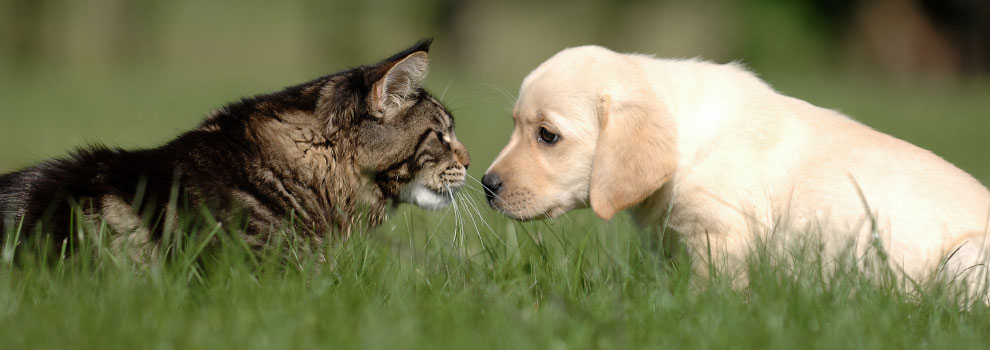

In [88]:
#import warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import shutil
import cv2
from random import shuffle
from tqdm import tqdm
from matplotlib.image import imread
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, plot_confusion_matrix, confusion_matrix
from sklearn.decomposition import PCA as pca
from sklearn.metrics import accuracy_score

In [93]:
TRAIN_DIR = 'D:/train'
#TEST_DIR = 'X:/Kaggle_Data/dogs_vs_cats/test/test'
IMG_SIZE = 40
LR = 1e-3

MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '2conv-basic')

In [94]:
def label_img(img):
    word_label = img.split('.')[-3]
    if word_label == 'cat': return 1
    elif word_label == 'dog': return 0

In [95]:
labal_data =[]
training_data = []
for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append(pd.Series(img.flatten()))
        labal_data.append(label)

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [03:11<00:00, 130.65it/s]


In [96]:
IMG_DF = pd.DataFrame(training_data)
LABEL_DF = pd.DataFrame(labal_data, columns = ['labels'])

In [97]:
df = pd.concat([IMG_DF, LABEL_DF], axis=1)
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,4791,4792,4793,4794,4795,4796,4797,4798,4799,labels
1961,241,246,244,241,246,244,241,246,244,241,...,167,175,212,170,175,215,167,175,214,1
435,255,255,255,221,213,220,252,255,253,255,...,162,178,184,172,187,191,233,240,238,1
22673,219,217,216,189,194,195,123,151,181,95,...,208,218,224,223,226,227,217,212,214,0
19488,104,106,99,120,119,115,117,116,112,118,...,5,12,31,3,10,29,2,9,28,0
2489,214,227,225,209,222,220,213,227,224,150,...,201,208,201,221,226,225,217,222,221,1
12150,105,117,115,105,113,122,106,115,124,108,...,0,2,3,39,37,26,1,0,4,1
23126,7,18,65,0,16,65,1,18,69,9,...,200,248,252,197,249,255,194,244,255,0
16386,16,16,16,14,14,14,11,11,11,16,...,225,227,237,254,254,250,240,243,248,0
1564,255,253,254,156,164,167,15,23,33,15,...,91,102,100,105,106,133,255,253,253,1
7850,179,206,227,173,201,227,71,88,110,33,...,97,71,60,127,99,89,134,101,86,1


In [98]:
df = df.sample(frac=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4791,4792,4793,4794,4795,4796,4797,4798,4799,labels
9016,118,121,136,116,119,134,120,123,138,124,...,175,174,190,174,171,187,170,167,183,1
22411,90,157,117,76,148,105,71,115,143,33,...,125,173,145,108,161,122,88,137,106,0
7320,45,63,70,31,50,55,37,52,64,33,...,87,117,128,86,115,126,77,105,116,1
631,86,90,85,86,89,87,87,90,88,87,...,155,159,154,97,88,88,28,25,24,1
19537,48,60,79,35,37,48,57,66,80,67,...,31,35,40,30,31,39,29,33,34,0


In [99]:
df.shape

(25000, 4801)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 9016 to 14689
Columns: 4801 entries, 0 to labels
dtypes: int64(1), uint8(4800)
memory usage: 114.8 MB


In [101]:
#Checking if have some null values for Clean the data
df.isnull().any().describe()

count      4801
unique        1
top       False
freq       4801
dtype: object

In [102]:
#how many Edible, Poisonous we have in the data set.
df['labels'].value_counts()

0    12500
1    12500
Name: labels, dtype: int64

<AxesSubplot:xlabel='labels', ylabel='count'>

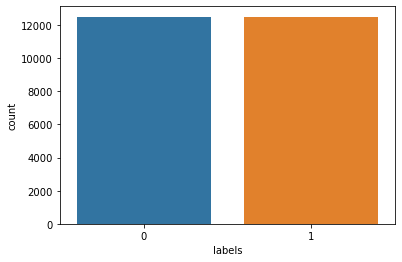

In [103]:
sns.countplot(x='labels', data=df)

In [104]:
X = df.drop('labels',axis = 1)
y = df['labels']

X.shape , y.shape

((25000, 4800), (25000,))

In [105]:
#split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [106]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((20000, 4800), (5000, 4800), (20000,), (5000,))

In [107]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,4790,4791,4792,4793,4794,4795,4796,4797,4798,4799
6446,16,29,46,9,22,51,0,14,38,2,...,12,13,14,14,10,12,13,8,10,11
4106,137,148,148,173,175,175,178,182,181,207,...,50,119,72,50,110,70,45,100,57,40
8306,111,99,97,121,126,124,31,34,38,26,...,146,130,132,140,121,133,135,106,105,117
16044,15,15,13,18,15,15,20,20,19,162,...,32,14,23,35,10,24,27,8,17,21
19471,58,85,112,55,75,110,60,81,114,55,...,114,74,126,126,72,135,126,81,135,138


In [108]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
#random forest classifier model.
RFC = RandomForestClassifier(n_estimators=120, max_depth=50, random_state=42)
RFC.fit(X_train, y_train)
y_predict = RFC.predict(X_test)
print('RandomForestClassifier Accuracy is: {}'.format(RFC.score(X_test,y_test)))

RandomForestClassifier Accuracy is: 0.6554


In [110]:
RFC_REPORT = classification_report(y_test, y_predict)
print(RFC_REPORT)

              precision    recall  f1-score   support

           0       0.66      0.62      0.64      2490
           1       0.65      0.69      0.67      2510

    accuracy                           0.66      5000
   macro avg       0.66      0.66      0.65      5000
weighted avg       0.66      0.66      0.65      5000



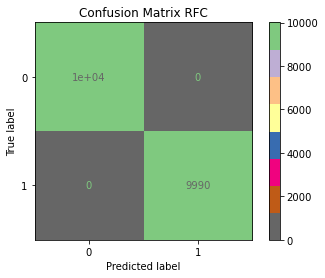

In [111]:
plot_confusion_matrix(RFC, X_train, y_train, cmap = "Accent_r", normalize= None)
plt.title('Confusion Matrix RFC')
plt.show()

In [112]:
#XGBClassifier model.
XGB = XGBClassifier(n_estimators=180, random_state=12, max_depth=5, use_label_encoder =False, eval_metric='mlogloss')
XGB.fit(X_train, y_train)
y_predict = XGB.predict(X_test)
print('XGBClassifier Accuracy is: {}'.format(XGB.score(X_test,y_test)))

XGBClassifier Accuracy is: 0.698


In [113]:
XGB_train_acc = (XGB.predict(X_train) == y_train).mean().round()
print("Training Accuracy =", XGB_train_acc)

Training Accuracy = 1.0


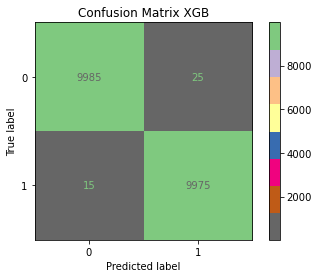

In [114]:
plot_confusion_matrix(XGB, X_train, y_train, cmap = "Accent_r", normalize= None)
plt.title('Confusion Matrix XGB')
plt.show()

In [116]:
PCA = pca(n_components = 0.9, random_state= 0, svd_solver='full')

X_Train_PCA = PCA.fit_transform(X_train)
X_test_PCA = PCA.transform(X_test)

print('Number of components is: {}'.format(PCA.n_components_))

Number of components is: 349


In [117]:
#XGBClassifier model.
XGB_PCA = XGBClassifier(n_estimators=180, max_depth=3, random_state=12, use_label_encoder =False, eval_metric='mlogloss')
XGB_PCA.fit(X_Train_PCA, y_train)
y_predict = XGB_PCA.predict(X_test_PCA)
print('XGBClassifier Accuracy is: {}'.format(XGB_PCA.score(X_test_PCA,y_test)))

XGBClassifier Accuracy is: 0.6602


In [124]:
param_grid = {'max_depth':[2,4,8],'num_class': [3], 'learning_rate':[0.001,0.005,0.001, 0.01, 0.1],'n_estimators':[100,150,200,250],'colsample_bytree':[0.3,0.7]}
xgb_c = XGBClassifier(objective='multi:softmax',n_jobs=-1,gamma=0,colsample_bytree=0.8)

XGBGridsearch = RandomizedSearchCV(estimator=xgb_c,param_distributions=param_grid,verbose=3,scoring='accuracy',n_jobs=-1,cv=5,n_iter=15)
XGBGridsearch.fit(X_Train_PCA,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[22:23:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.8, gamma=0,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jo...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                          

In [125]:
XGBGridsearch.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=-1, num_class=3, num_parallel_tree=1,
              objective='multi:softmax', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [129]:
import sklearn.metrics as metrics
y_pred = XGBGridsearch.predict(X_test_PCA)
print('XGBGridsearch Accuracy is: {}'.format(metrics.accuracy_score(y_test,y_pred)))

XGBGridsearch Accuracy is: 0.6744


In [ ]:
from sklearn.ensemble import BaggingClassifier
#bagging = BaggingClassifier(XGBGridsearch,max_samples=0.5, max_features=0.5)
bes = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=250, n_jobs=-1, num_class=3, num_parallel_tree=1,
              objective='multi:softmax',eval_metric='mlogloss', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

bagging = BaggingClassifier(base_estimator=bes)
bagging.fit(X_Train_PCA, y_train)

In [ ]:
print('BaggingClassifier Accuracy is: {}'.format(bagging.score(X_test_PCA,y_test)))

In [118]:
#random forest classifier model.
RFC_PCA = RandomForestClassifier(n_estimators=180, max_depth=3, random_state=12)
RFC_PCA.fit(X_Train_PCA, y_train)
y_predict = RFC_PCA.predict(X_test_PCA)
print('RandomForestClassifier Accuracy is: {}'.format(RFC_PCA.score(X_test_PCA,y_test)))

RandomForestClassifier Accuracy is: 0.6282


In [119]:
forest_params = {'n_estimators':[100,200,400], 'max_depth':[None,30,100],'max_features':['auto','sqrt','log2'],'random_state':[0]}
forest_grid_search = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1),forest_params,cv=3,scoring='accuracy',return_train_score=True,random_state=0)
forest_grid_search.fit(X_Train_PCA,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_depth': [None, 30, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 200, 400],
                                        'random_state': [0]},
                   random_state=0, return_train_score=True, scoring='accuracy')

In [120]:
forest_grid_search.best_estimator_

RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators=400,
                       n_jobs=-1, random_state=0)

In [122]:
y_pred = forest_grid_search.predict(X_test_PCA)
print('Forest Grid search Accuracy is: {}'.format(metrics.accuracy_score(y_test,y_pred)))

Forest Grid search Accuracy is: 0.6392


In [154]:
#knn classifier with for loop [1-5] to check the best accuracy of n
K = list(range(10, 31))
scores = []
for n in K:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_Train_PCA, y_train)
    y_pred = knn.predict(X_Train_PCA)
    scores.append(knn.score(X_test_PCA,y_test))
    print('KNeighborsClassifier: n = {} , Accuracy is: {}'.format(n,knn.score(X_test_PCA,y_test)))

KNeighborsClassifier: n = 10 , Accuracy is: 0.609
KNeighborsClassifier: n = 11 , Accuracy is: 0.6122
KNeighborsClassifier: n = 12 , Accuracy is: 0.6116
KNeighborsClassifier: n = 13 , Accuracy is: 0.6112
KNeighborsClassifier: n = 14 , Accuracy is: 0.615
KNeighborsClassifier: n = 15 , Accuracy is: 0.6134
KNeighborsClassifier: n = 16 , Accuracy is: 0.614
KNeighborsClassifier: n = 17 , Accuracy is: 0.6176
KNeighborsClassifier: n = 18 , Accuracy is: 0.6166
KNeighborsClassifier: n = 19 , Accuracy is: 0.6196
KNeighborsClassifier: n = 20 , Accuracy is: 0.6208
KNeighborsClassifier: n = 21 , Accuracy is: 0.6232
KNeighborsClassifier: n = 22 , Accuracy is: 0.6232
KNeighborsClassifier: n = 23 , Accuracy is: 0.624
KNeighborsClassifier: n = 24 , Accuracy is: 0.626
KNeighborsClassifier: n = 25 , Accuracy is: 0.6274
KNeighborsClassifier: n = 26 , Accuracy is: 0.6312
KNeighborsClassifier: n = 27 , Accuracy is: 0.626
KNeighborsClassifier: n = 28 , Accuracy is: 0.626
KNeighborsClassifier: n = 29 , Accurac

Text(0, 0.5, 'Accuracy')

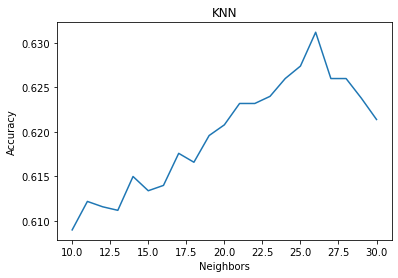

In [155]:
plt.plot(K, scores)
plt.title("KNN")
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')

In [159]:
knn = KNeighborsClassifier(n_neighbors = 26)
knn.fit(X_Train_PCA, y_train)
y_pred = knn.predict(X_Train_PCA)
print('KNeighborsClassifier: n = {} , Accuracy is: {}'.format(26,knn.score(X_test_PCA,y_test)))

KNeighborsClassifier: n = 26 , Accuracy is: 0.6312


In [166]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_Train_PCA, y_train)
GNB_P = GNB.predict(X_Train_PCA)
print('GaussianNB Accuracy is: {}'.format(GNB.score(X_test_PCA,y_test)))

Forest Grid search Accuracy is: 0.571
